#### Import libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Read data from file csv

In [14]:
data = pd.read_csv('Data/BonBanh_cleaned.csv')
data

,Hãng xe,Năm sản xuất,Tình trạng,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Nhiên liệu,Số chỗ ngồi,Giá xe (triệu)
0,Peugeot,2022,Xe đã dùng,30000,Lắp ráp trong nước,Crossover,Số tự động,Xăng,5,679
1,Mercedes Benz,2014,Xe đã dùng,90000,Lắp ráp trong nước,Sedan,Số tự động,Xăng,5,499
2,Mercedes Benz,2022,Xe đã dùng,500,Lắp ráp trong nước,Sedan,Số tự động,Xăng,5,2229
3,Mercedes Benz,2021,Xe đã dùng,80,Lắp ráp trong nước,Sedan,Số tự động,Xăng,5,1399
4,Mercedes Benz,2022,Xe đã dùng,8888,Lắp ráp trong nước,Sedan,Số tự động,Xăng,5,1788
...,...,...,...,...,...,...,...,...,...,...
18351,Kia,2009,Xe đã dùng,1111,Nhập khẩu,Hatchback,Số tự động,Xăng,5,158
18352,Hyundai,2018,Xe đã dùng,80000,Lắp ráp trong nước,Sedan,Số tay,Xăng,5,328
18353,Toyota,2023,Xe mới,0,Lắp ráp trong nước,Sedan,Số tự động,Xăng,5,592
18354,Mitsubishi,2023,Xe mới,0,Nhập khẩu,Sedan,Số tự động,Xăng,5,465


#### Split the type of columns

In [15]:
data.nunique()

Hãng xe             68
Năm sản xuất        35
Tình trạng           2
Số km đã đi       1053
Xuất xứ              2
Kiểu dáng           10
Hộp số               3
Nhiên liệu           4
Số chỗ ngồi         18
Giá xe (triệu)    1786
dtype: int64

In [16]:
str_numerical_cols = []
not_str_numerical_cols = []
categorical_cols = []
for col in data.columns:
    if len(data[col].unique()) < 6:
        categorical_cols.append(col)
    else:
        if data[col].dtypes == 'object':
            str_numerical_cols.append(col)
        else:
            if col != 'Giá xe (triệu)':
                not_str_numerical_cols.append(col)
print(str_numerical_cols)
print(not_str_numerical_cols)
print(categorical_cols)

['Hãng xe', 'Kiểu dáng']
['Năm sản xuất', 'Số km đã đi', 'Số chỗ ngồi']
['Tình trạng', 'Xuất xứ', 'Hộp số', 'Nhiên liệu']


#### Handle outliers

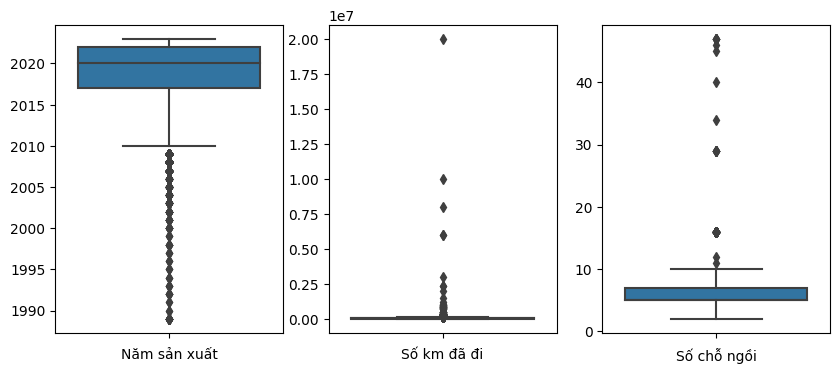

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for i in range(len(not_str_numerical_cols)):
    col = not_str_numerical_cols[i]
    sns.boxplot(y=data[col], ax=axes[i])
for i in range(len(not_str_numerical_cols)):
    axes[i].set_xlabel(not_str_numerical_cols[i])
    axes[i].set_ylabel("")
plt.show()

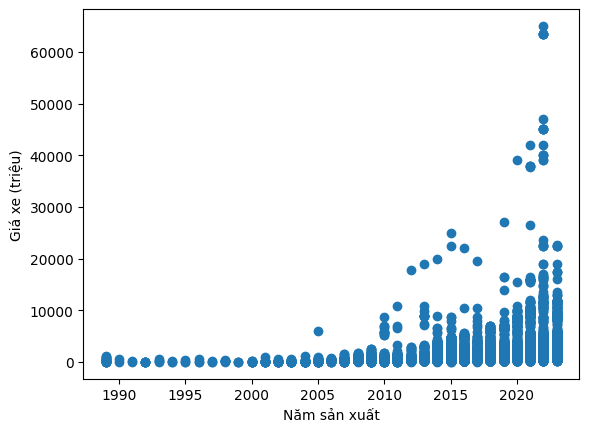

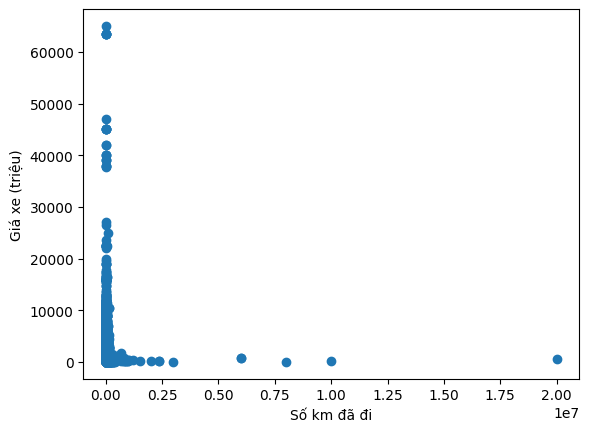

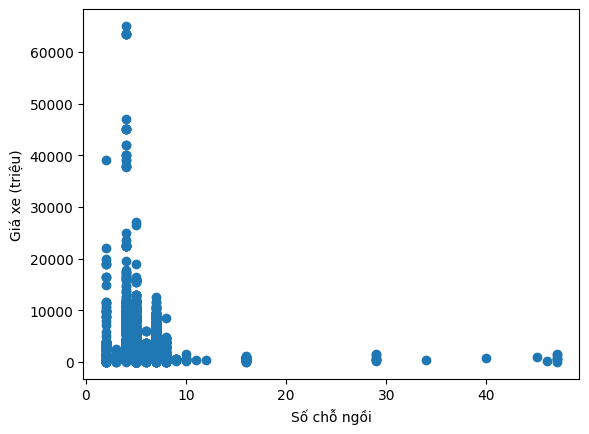

In [18]:
#scatter plot for numerical columns and price
for col in not_str_numerical_cols:
    plt.scatter(data[col], data['Giá xe (triệu)'])
    plt.xlabel(col)
    plt.ylabel('Giá xe (triệu)')
    plt.show()

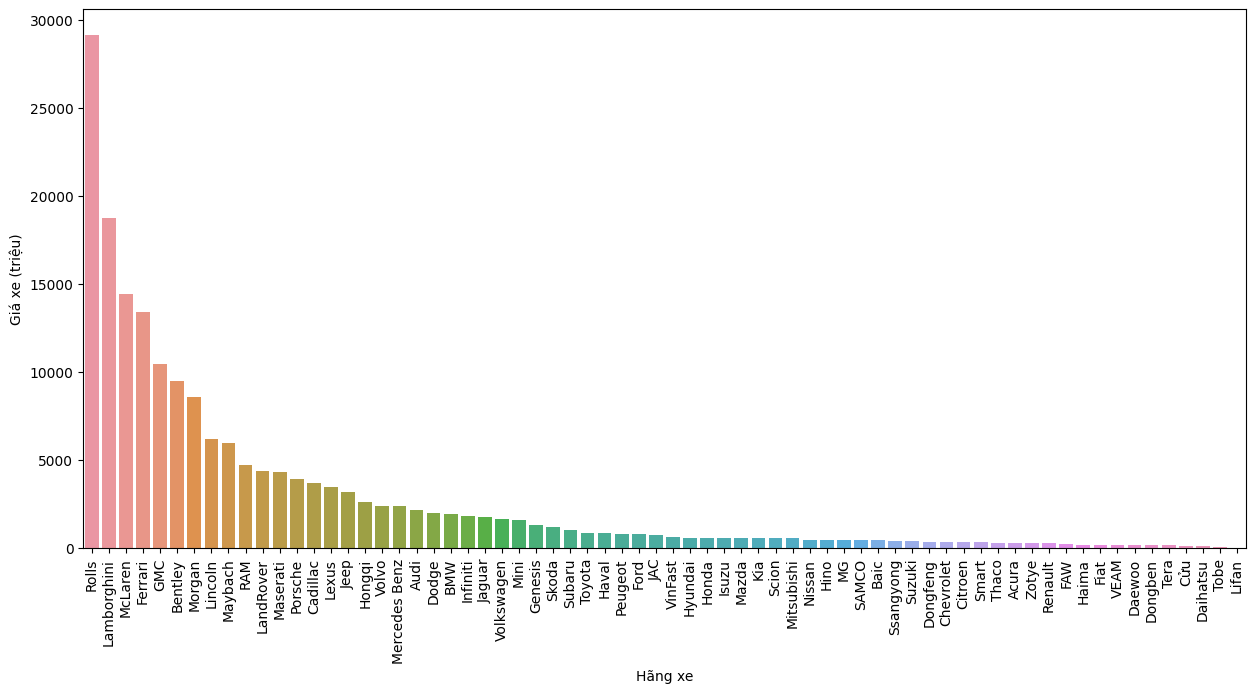

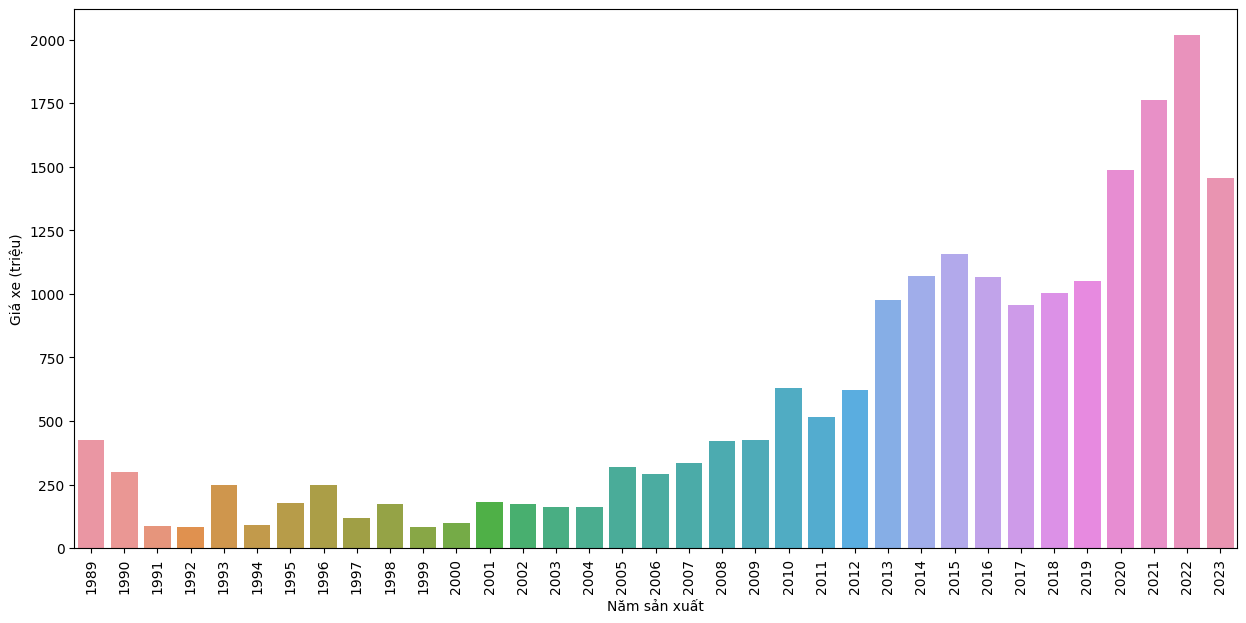

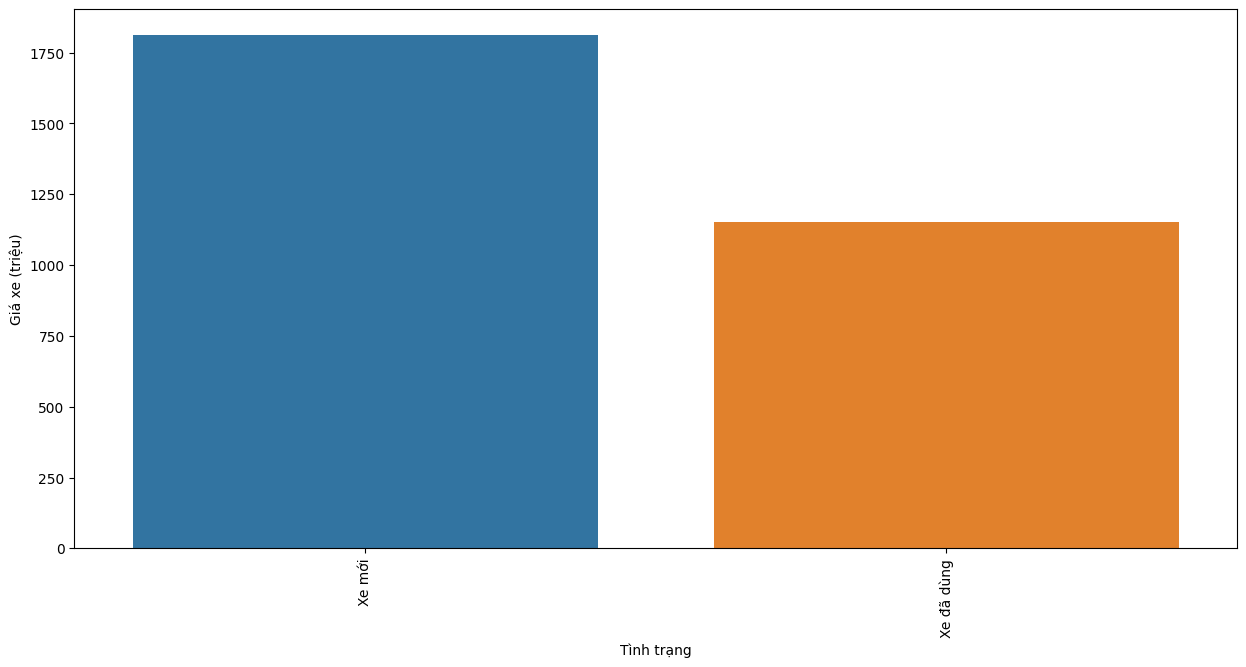

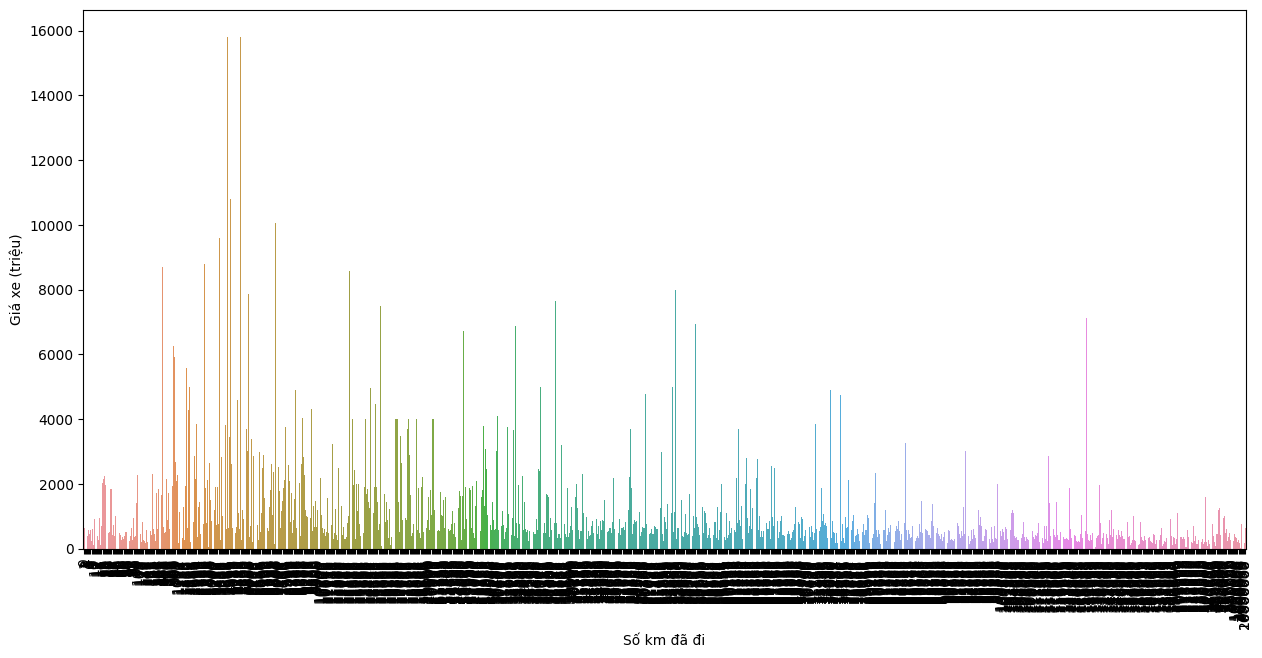

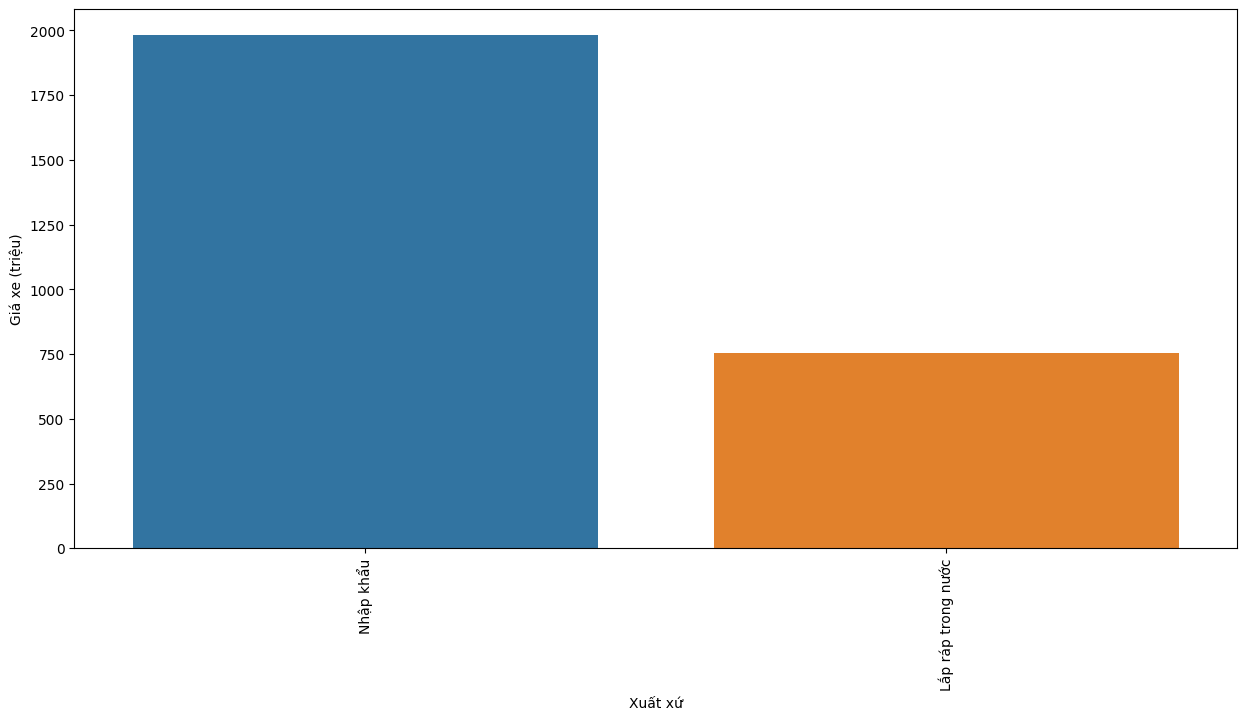

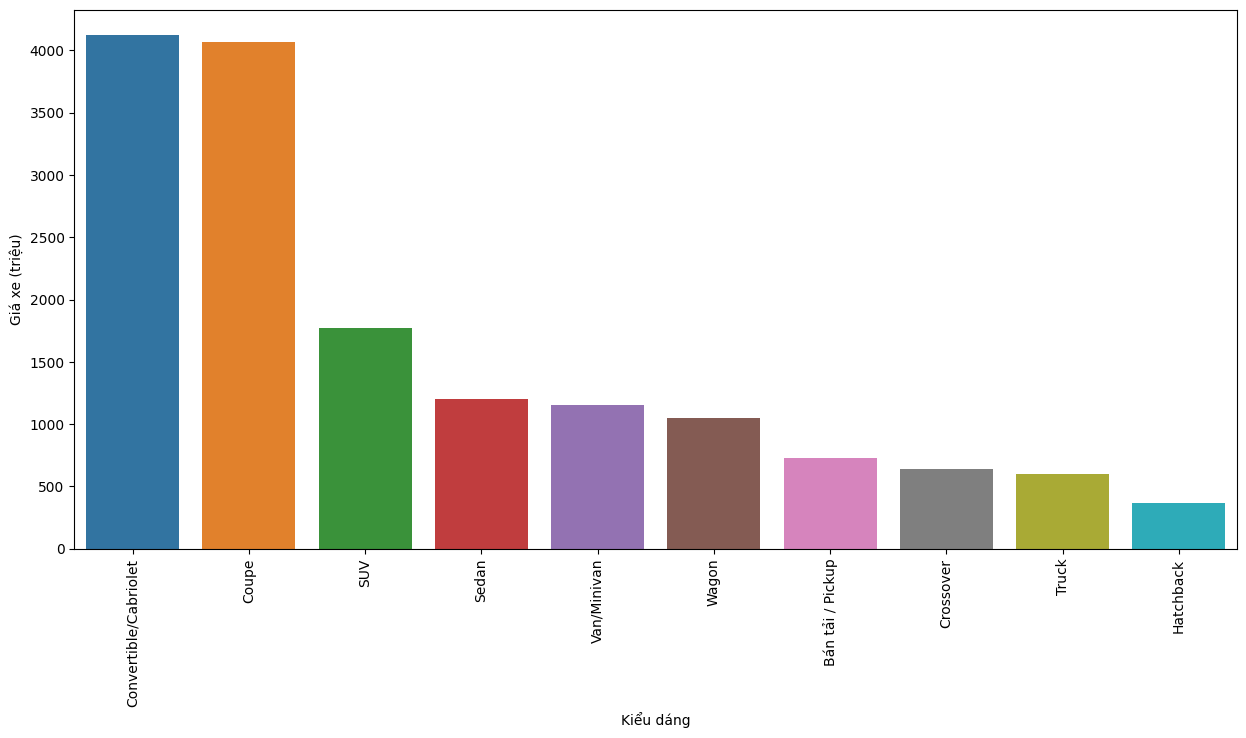

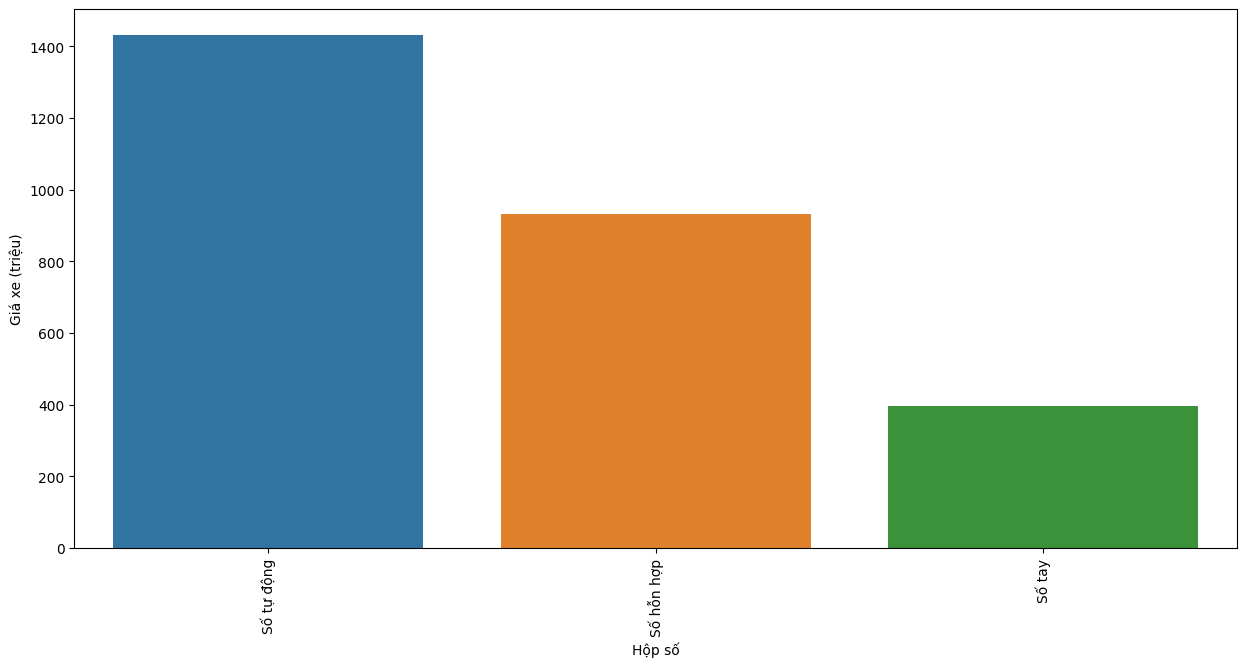

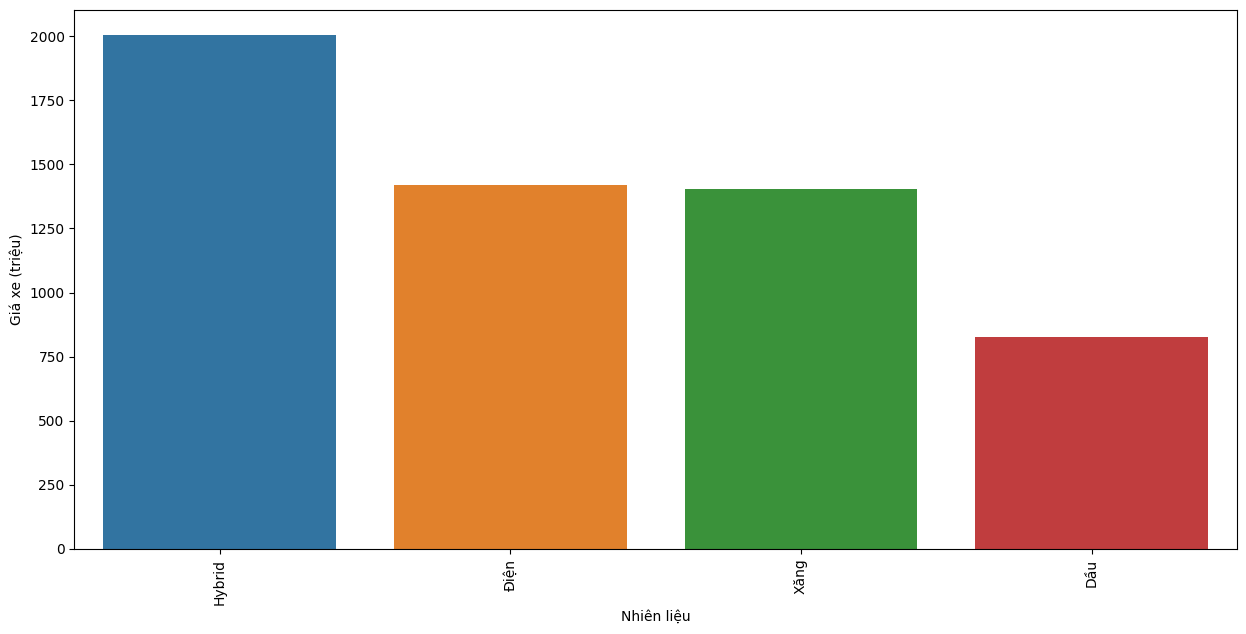

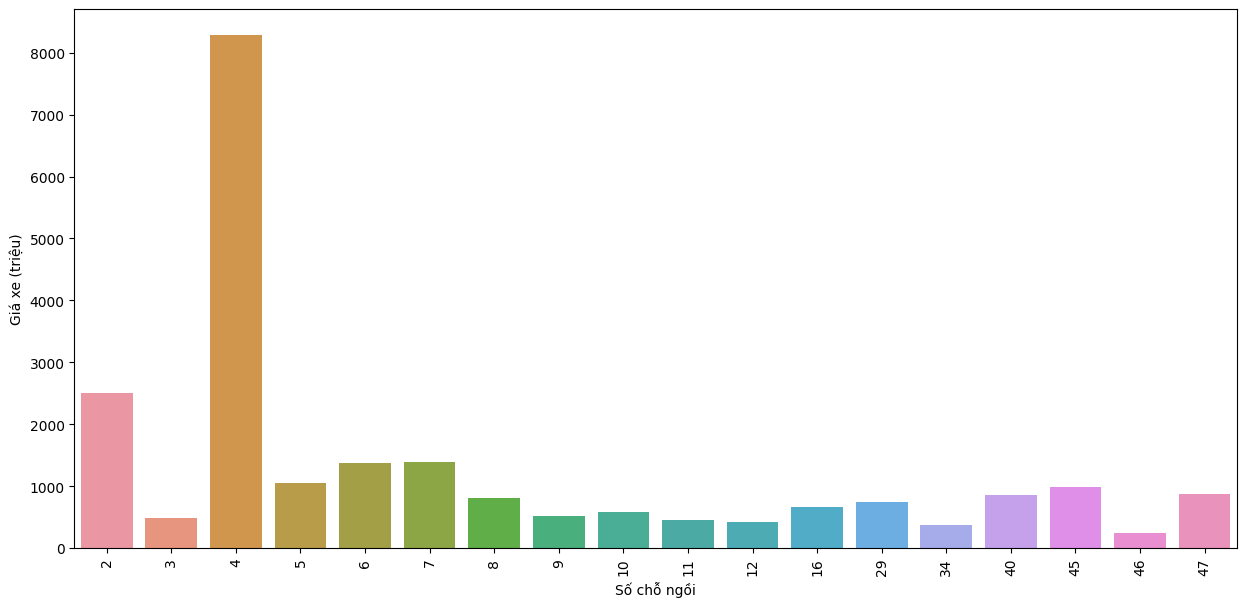

In [19]:
for col in data.columns:
    if col != 'Giá xe (triệu)':
        plt.figure(figsize=(15, 7))
        sns.barplot(x=col, y='Giá xe (triệu)', data=data.groupby(col)['Giá xe (triệu)'].mean().sort_values(ascending=False).reset_index())
        plt.xticks(rotation=90)
        plt.show()

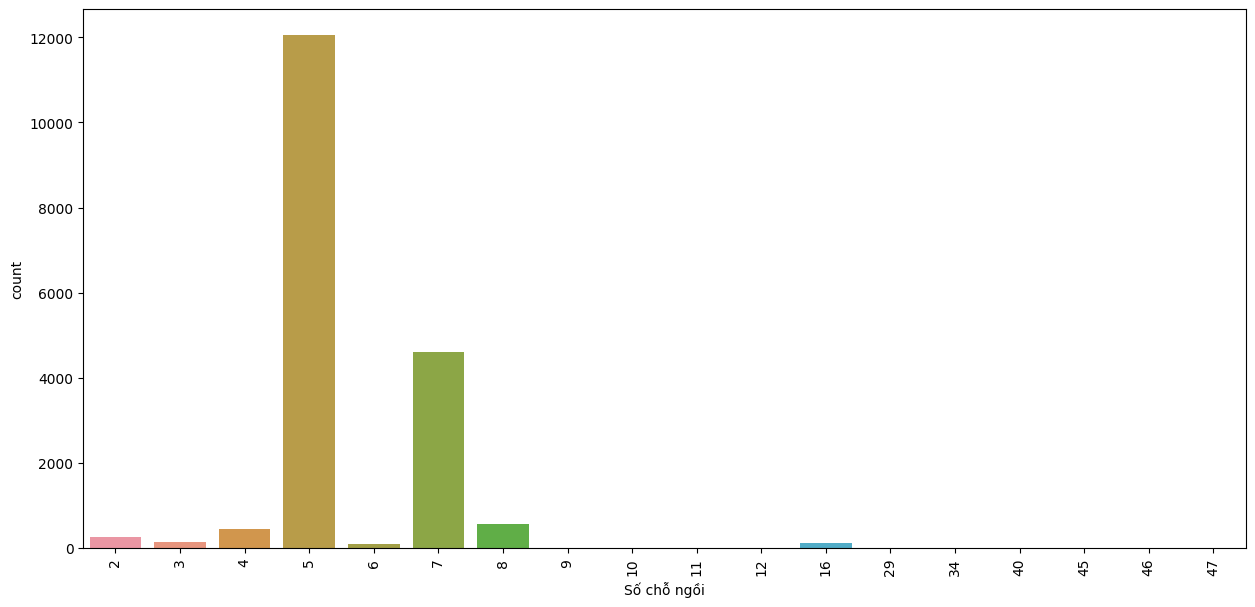

In [20]:
plt.figure(figsize=(15, 7))
sns.countplot(x='Số chỗ ngồi', data=data)
plt.xticks(rotation=90)
plt.show()

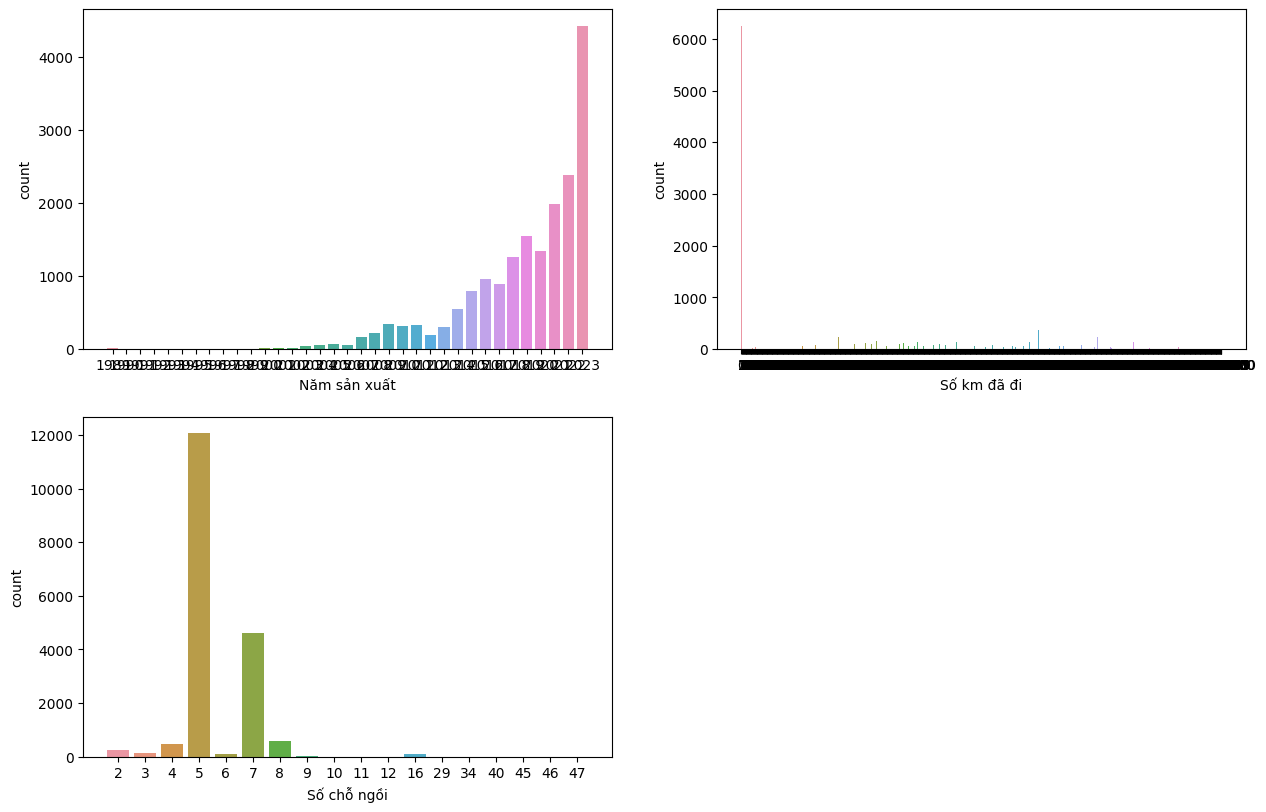

In [21]:
plt.figure(figsize=(15,15))
for i,col in enumerate(not_str_numerical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[col])
    plt.plot()

#### Change all values in string numerical columns that the percent of the number of this value < 5% to *Khác*

In [22]:
def change_to_others(col):
    percent = data[col].value_counts(normalize=True)
    return np.where(percent[data[col]].values < 0.05, 'Khác', data[col])
for col in str_numerical_cols:
    data[col] = change_to_others(col)

#### Plot all string numerical columns

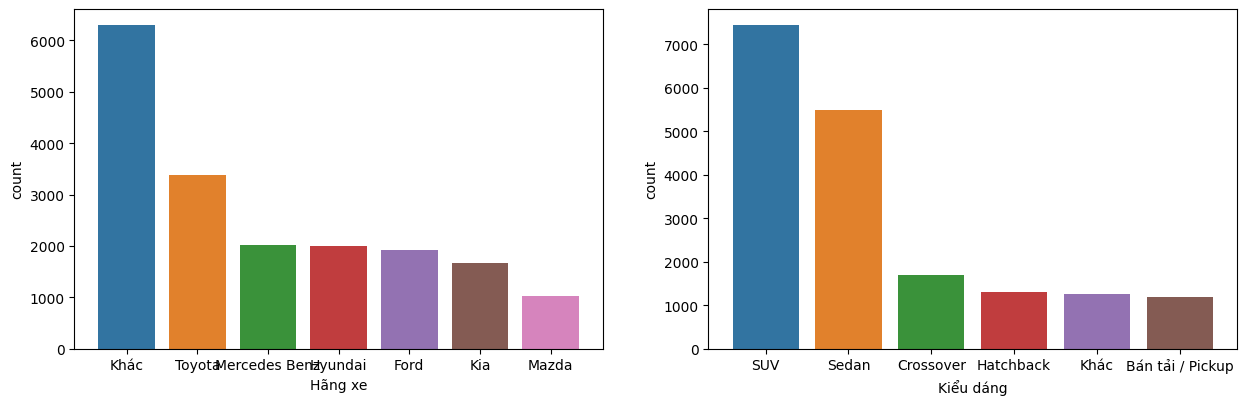

In [23]:
plt.figure(figsize=(15,15))
for i,col in enumerate(str_numerical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.plot()

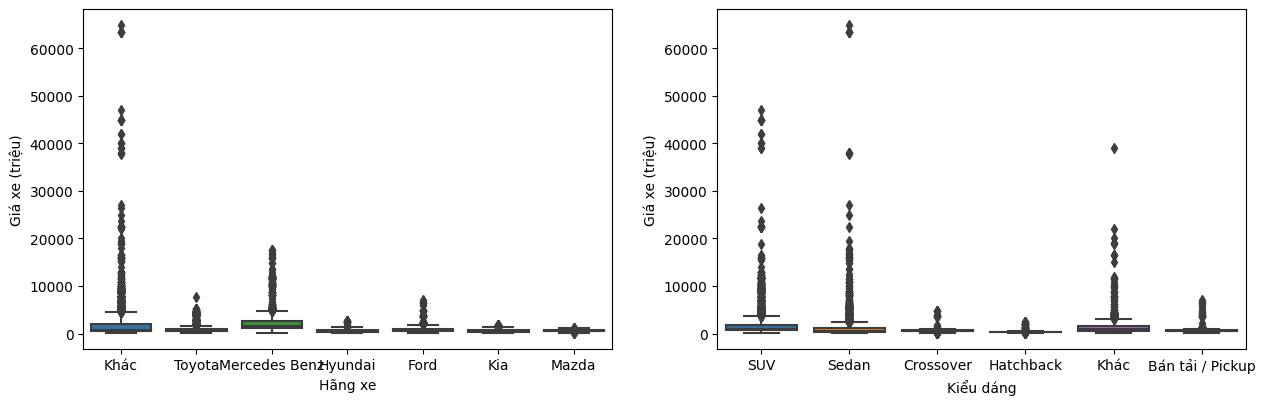

In [24]:
# vizualize price of each value khac in all str_numerical_cols
plt.figure(figsize=(15,15))
for i,col in enumerate(str_numerical_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=data[col], y=data['Giá xe (triệu)'], order=data[col].value_counts().index)
    plt.plot()

#### Plot all categorical column

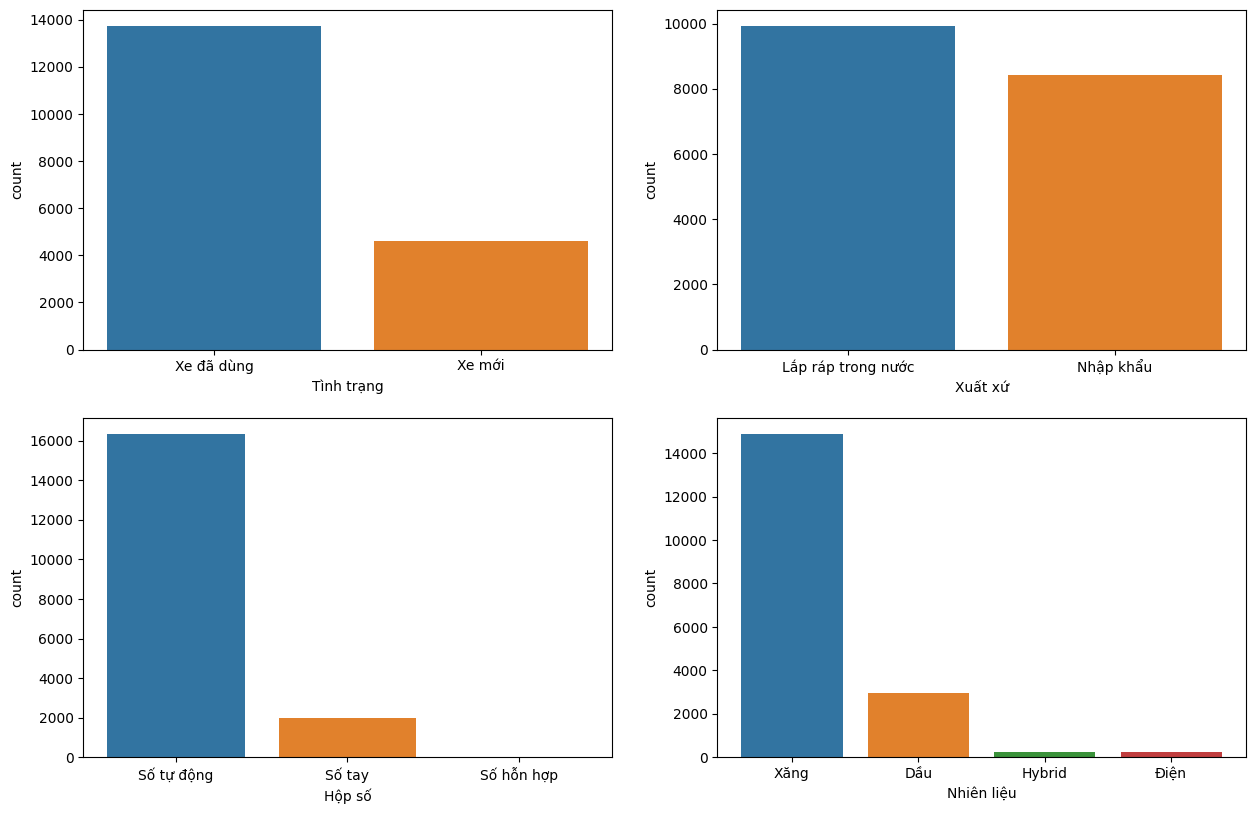

In [25]:
plt.figure(figsize=(15,15))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.plot()